# <font color='blue'>REPORT OF CHURN PREDICTION FOR TELCO </font>
<div class="alert alert-block alert-info">
<b>Source:</b> Data from IBM community (Business analytics section) in relation to data science interview
</div>

In [1]:
import sklearn
sklearn.__version__

'0.20.4'

In [1]:
#To eliminate warnings from the outputs
import warnings
warnings.filterwarnings("ignore")

#Libraries for data manipulation
import pandas as p
from numpy import nan
import statistics
from sklearn.preprocessing import scale
import numpy as np
from collections import Counter
from sklearn import preprocessing
from itertools import compress
import math

#Libraries for machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFECV
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.cluster import KMeans

#Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sn
import plotly.express as px

In [2]:
#Importing the data set
data = p.read_csv("C:/Users/eugen/Desktop/Work/Merkle/Customer_Churn.csv")

In [8]:
print(len(data))

7043


In [108]:
print(len(list(data)))

22


In [4]:
data.loc[:,"customerID":"TechSupport"].head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No


In [6]:
data.loc[:,"StreamingTV":"Churn"].head()

,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,No,No,One year,No,Mailed check,56.95,1889.5,No
2,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data exploration analysis

## 1) Descriptive statistics and Visualization

In [3]:
#Converting the Total charges column from string to numeric
TotalCharges_num = []
for i in range(0,len(data["TotalCharges"])):
    if data.loc[i,"TotalCharges"] != ' ':
        TotalCharges_num.append(float(data.loc[i,"TotalCharges"]))
    else:
        TotalCharges_num.append(0)

data["TotalCharges"] = TotalCharges_num
    

In [59]:
#Descriptive statistics of the numeric features
data.loc[:,["tenure","MonthlyCharges","TotalCharges"]].describe()


,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


In [4]:
#Correlation matrix of quantitative features
data.loc[data["Churn"]=='Yes',["tenure","MonthlyCharges","TotalCharges"]].corr()

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.401286,0.954017
MonthlyCharges,0.401286,1.000000,0.545772
TotalCharges,0.954017,0.545772,1.000000


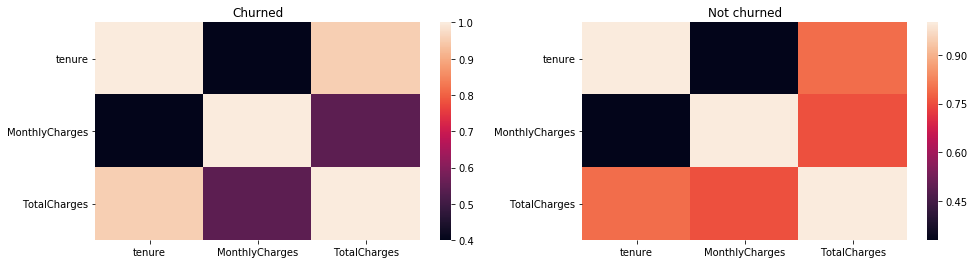

In [20]:
#Correlation heatmap of the numeric features
#plt.figure(figsize= (12, 6))
figure, axes = plt.subplots(nrows=1, ncols=2,figsize=(16,4))
sn.heatmap(data.loc[data["Churn"]=='Yes',["tenure","MonthlyCharges","TotalCharges"]].corr(),ax=axes[0])
axes[0].set_title("Churned")
sn.heatmap(data.loc[data["Churn"]=='No',["tenure","MonthlyCharges","TotalCharges"]].corr(),ax=axes[1])
axes[1].set_title("Not churned")
plt.show()

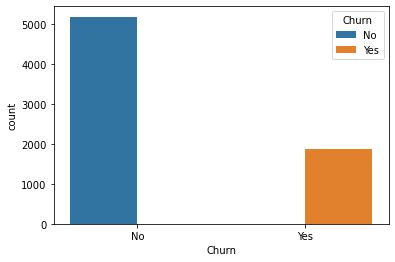

In [111]:
#Distribution of the churn status
sn.countplot(x="Churn", data=data,hue='Churn')
plt.show()

In [115]:
print(len(data.loc[data["Churn"]=='Yes',]))
print(len(data.loc[data["Churn"]=='No',]))

1869
5174


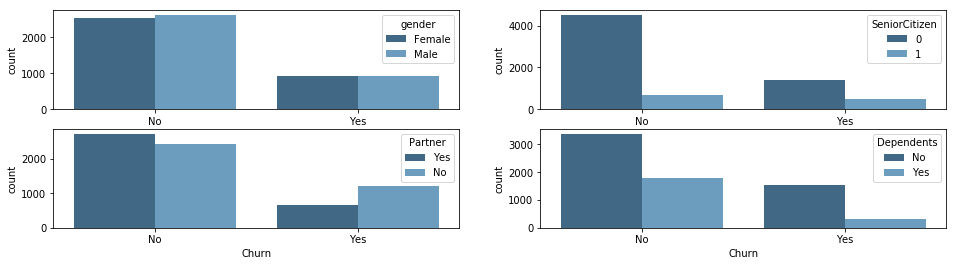

In [22]:
####################### DEMOGRAPHIC INFO ##################################
#gender, age range, and if they have partners and dependents
figure, axes = plt.subplots(nrows=2, ncols=2,figsize=(16,4))
sn.countplot(x="Churn", data=data,hue='gender', palette="Blues_d", ax=axes[0,0])
sn.countplot(x="Churn", data=data,hue='SeniorCitizen', palette="Blues_d", ax=axes[0,1])
sn.countplot(x="Churn", data=data,hue='Partner', palette="Blues_d", ax=axes[1,0])
sn.countplot(x="Churn", data=data,hue='Dependents', palette="Blues_d", ax=axes[1,1])
plt.show()

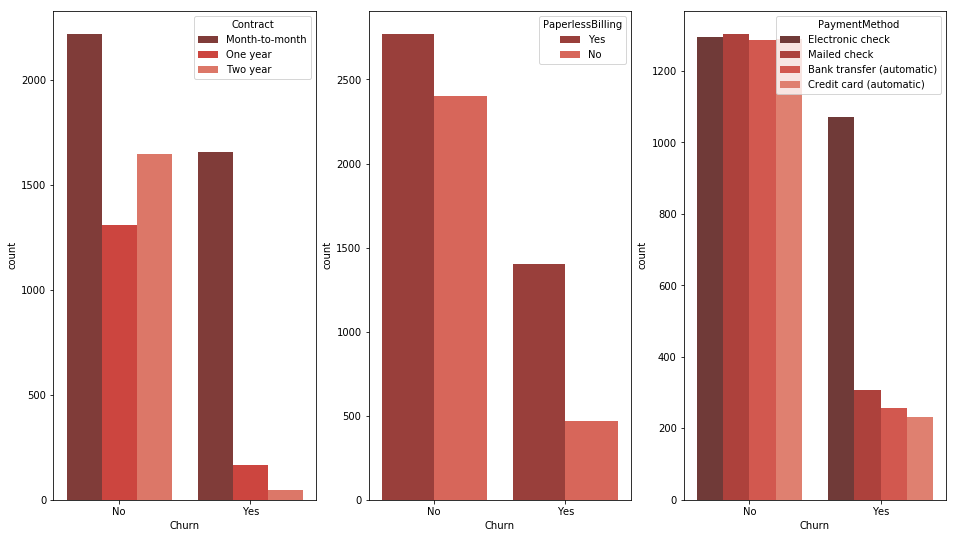

In [29]:
########################### CUSTOMER ACCOUNT INFO #########################################
#contract, payment method, paperless billing
figure, axes = plt.subplots(nrows=1, ncols=3,figsize=(16,9))
sn.countplot(x="Churn", data=data,hue='Contract', palette="Reds_d", ax=axes[0])
sn.countplot(x="Churn", data=data,hue='PaperlessBilling', palette="Reds_d", ax=axes[1])
sn.countplot(x="Churn", data=data,hue='PaymentMethod', palette="Reds_d", ax=axes[2])
plt.show()


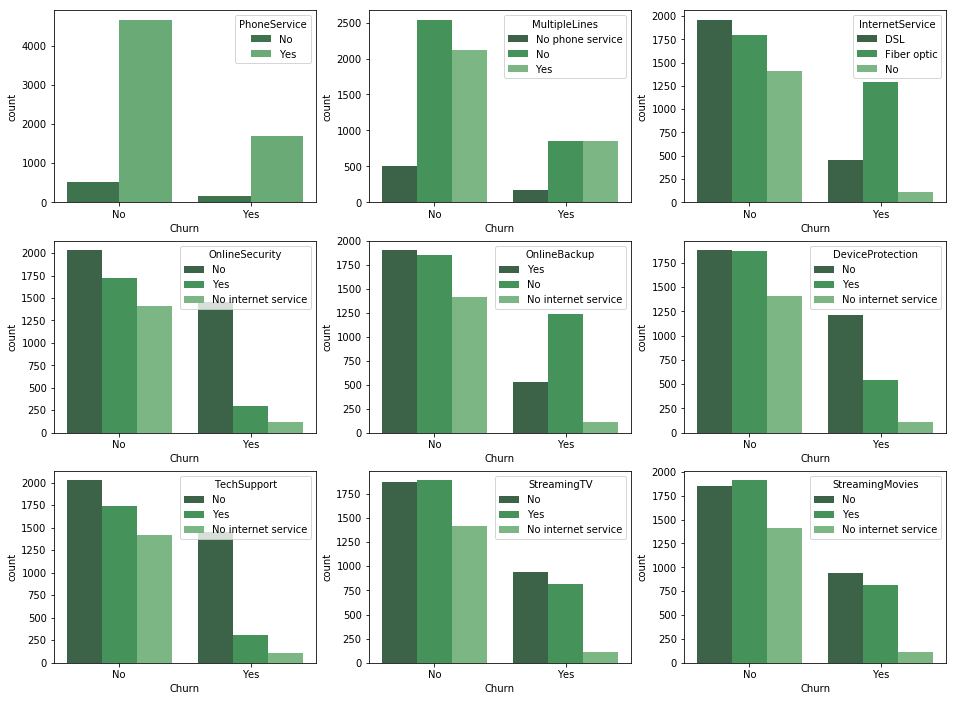

In [24]:
############################## SIGNED UP SERVICES ###########################################
#phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
figure, axes = plt.subplots(nrows=3, ncols=3,figsize=(16,12))
sn.countplot(x="Churn", data=data,hue='PhoneService', palette="Greens_d", ax=axes[0,0])
sn.countplot(x="Churn", data=data,hue='MultipleLines', palette="Greens_d", ax=axes[0,1])
sn.countplot(x="Churn", data=data,hue='InternetService', palette="Greens_d", ax=axes[0,2])
sn.countplot(x="Churn", data=data,hue='OnlineSecurity', palette="Greens_d", ax=axes[1,0])
sn.countplot(x="Churn", data=data,hue='OnlineBackup', palette="Greens_d", ax=axes[1,1])
sn.countplot(x="Churn", data=data,hue='DeviceProtection', palette="Greens_d", ax=axes[1,2])
sn.countplot(x="Churn", data=data,hue='TechSupport', palette="Greens_d", ax=axes[2,0])
sn.countplot(x="Churn", data=data,hue='StreamingTV', palette="Greens_d", ax=axes[2,1])
sn.countplot(x="Churn", data=data,hue='StreamingMovies', palette="Greens_d", ax=axes[2,2])
plt.show()

# Feature engineering and Pre-processing

1. **Handling missing observation:**
2. **Dummy variable creation:** 
3. **Creation of other new features:** 
3. **Handling outliers:** 

### 1.1 Missing values

In [59]:
#Number of missing data per variable in train set
missing_df = p.DataFrame(data.loc[:,"gender":"Churn"].isnull().sum().sort_values(ascending=False),columns=['Missing'])
missing_df

,Missing
Churn,0
TotalCharges,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


### 1.2 Dummification

In [5]:
#Dummification of the categorical features
data_dums = p.get_dummies(data.loc[:,"gender":"TotalCharges"])
data_dums.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


### 1.3 Creation of new feature

In [46]:
# Comparison between streaming features
p.crosstab(data["StreamingTV"],data["StreamingMovies"])

StreamingMovies,No,No internet service,Yes
StreamingTV,,,
No,2018,0,792
No internet service,0,1526,0
Yes,767,0,1940


In [6]:
#Creation of feature for Streaming both TV and Movies
Streaming = []
for i in range(0,len(data)):
    if data.loc[i,"StreamingTV"]=="Yes" and data.loc[i, "StreamingMovies"]=="Yes":
        Streaming.append("TV & Movies")
    elif data.loc[i,"StreamingTV"]=="No" and data.loc[i, "StreamingMovies"]=="No":
        Streaming.append("None")
    elif data.loc[i,"StreamingTV"]=="Yes" and data.loc[i, "StreamingMovies"]=="No":
        Streaming.append("TV")
    elif data.loc[i,"StreamingTV"]=="No" and data.loc[i, "StreamingMovies"]=="Yes":
        Streaming.append("Movies")
    else:
        Streaming.append("No internet service")
data["Streaming"] = Streaming


In [7]:
#Adding dummy variables to the previous dummified data
data2 = p.DataFrame(data.drop(["TotalCharges","StreamingTV","StreamingMovies","Churn","customerID"],axis=1))
data_dum = p.get_dummies(data2.loc[:,"gender":"Streaming"])
data_dum.head()

,SeniorCitizen,tenure,MonthlyCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Streaming_Movies,Streaming_No internet service,Streaming_None,Streaming_TV,Streaming_TV & Movies
0,0,1,29.85,1,0,0,1,1,0,1,...,1,0,0,1,0,0,0,1,0,0
1,0,34,56.95,0,1,1,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
2,0,2,53.85,0,1,1,0,1,0,0,...,1,0,0,0,1,0,0,1,0,0
3,0,45,42.30,0,1,1,0,1,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0,2,70.70,1,0,1,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0


### 1.4 Handling outliers

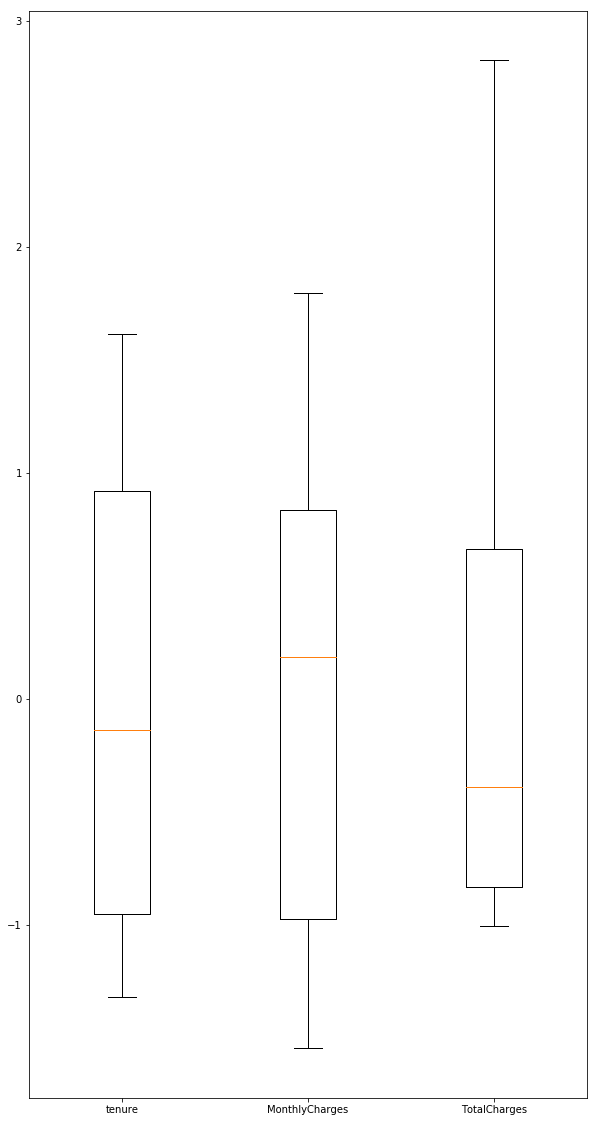

In [45]:
#Checking outliers
data_bp = data_dums.loc[:,"tenure":"TotalCharges"].select_dtypes(exclude=['object']).copy()
data_scaled = scale(data_bp )

# Create a figure instance
fig = plt.figure(1, figsize=(10, 20))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bxlabs=list(data_bp)

# Create the boxplot
bp = ax.boxplot(data_scaled,labels=bxlabs,showfliers=True,vert=True)
plt.show()

# Prediction analysis

In [8]:
#Selection of features 
features_X = list(data_dum)

# Predictors
data_X = data_dum

#Selection of target
data_Y = data["Churn"].replace("Yes",1).replace("No",0)


In [9]:
#Correction for class imbalance
sm = SMOTE(random_state=2) #set state so that we have the same generated data everytime
x_data_res, y_data_res = sm.fit_sample(data_X, data_Y)

#Splitting into train and test set
train_X, test_X, train_y, test_y = train_test_split(x_data_res, y_data_res, test_size=0.2, random_state=12)

## Full Random forest classifier

In [33]:
############################# FULL RANDOM FOREST CLASSIFIER #####################################################
#Searching for optimal hyperparameters via grid search (Hyperparameter tuning)
full_RF = RandomForestClassifier(random_state=0)

param_grid_RF = {'n_estimators': [20, 50, 70, 100],'max_depth': [5, 7, 10, 15], 'min_samples_leaf':[5, 10, 15]}
grid_full_RF = GridSearchCV(full_RF, param_grid_RF, cv=10)
grid_full_RF.fit(train_X, train_y)

# Initialising calibration method with 10-fold cross-validation
full_RF_cal = RandomForestClassifier(random_state=0, max_depth=grid_full_RF.best_params_['max_depth'], 
                                   n_estimators=grid_full_RF.best_params_['n_estimators'],
                                  min_samples_leaf=grid_full_RF.best_params_['min_samples_leaf'])
cal_full_RF = CalibratedClassifierCV(full_RF_cal, cv=10, method='isotonic')

# Calibrate probabilities
cal_full_RF.fit(train_X, train_y)

#Generalisation performance of the reduced model
print("AUC: ",roc_auc_score(test_y, cal_full_RF.predict(test_X)))

AUC:  0.8550398735407105


In [34]:
#Preceision and recall for random forest
print(classification_report(test_y, cal_full_RF.predict(test_X)))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1064
           1       0.85      0.85      0.85      1006

   micro avg       0.86      0.86      0.86      2070
   macro avg       0.85      0.86      0.85      2070
weighted avg       0.86      0.86      0.86      2070



## Full Gradient boost classifier

In [68]:
############################## FULL GRADIENT BOOST CLASSIFIER ###################################
full_GB = GradientBoostingClassifier(random_state=0)
param_grid_GB = {'learning_rate' : [0.001, 0.01, 0.1]}
grid_full_GB = GridSearchCV(full_GB, param_grid_GB, cv=10)
grid_full_GB.fit(train_X, train_y)

# Initialising calibration method with 10-fold cross-validation
full_GB = GradientBoostingClassifier(random_state=0, learning_rate=grid_full_GB.best_params_['learning_rate'])

# Calibrate probabilities
cal_full_GB = CalibratedClassifierCV(full_GB, cv=10, method='isotonic')
cal_full_GB.fit(train_X, train_y)

#Generalisation performance of the full model
print("AUC: ",roc_auc_score(test_y, cal_full_GB.predict(test_X)))

C:\Users\eugen\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



AUC:  0.8627034783778531


In [35]:
#Preceision and recall for gradient boost classifier
print(classification_report(test_y, cal_full_GB.predict(test_X)))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1064
           1       0.87      0.84      0.86      1006

   micro avg       0.86      0.86      0.86      2070
   macro avg       0.86      0.86      0.86      2070
weighted avg       0.86      0.86      0.86      2070



## Full logistic regression model

In [37]:
############################# FULL LOGISTIC REGRESSION ######################################
#Searching for optimal hyperparameters via grid search (Hyperparameter tuning)
full_log = LogisticRegression(random_state=0)

param_grid_log = {'solver': ['newton-cg', 'lbfgs', 'liblinear'],
                 'C':[0.001, 0.005, 0.01, 0.08, 0.1, 0.8, 1]}
grid_full_log = GridSearchCV(full_log, param_grid_log, cv=10)
grid_full_log.fit(train_X, train_y)

# Initialising calibration method with 10-fold cross-validation
full_log = LogisticRegression(random_state=0, solver=grid_full_log.best_params_['solver'], C=grid_full_log.best_params_['C'])
cal_full_log = CalibratedClassifierCV(full_log, cv=10, method='sigmoid')

# Calibrate probabilities
cal_full_log.fit(train_X, train_y)

#Generalisation performance of the reduced model
print("AUC: ",roc_auc_score(test_y, cal_full_log.predict(test_X)))

AUC:  0.7664511053976891


In [38]:
#Preceision and recall for random forest
print(classification_report(test_y, cal_full_log.predict(test_X)))

              precision    recall  f1-score   support

           0       0.79      0.74      0.76      1064
           1       0.74      0.79      0.77      1006

   micro avg       0.77      0.77      0.77      2070
   macro avg       0.77      0.77      0.77      2070
weighted avg       0.77      0.77      0.77      2070



## Full K-nearest neighbour classifier

In [14]:
############################## FULL K-NEAREST NEIGHBOUR CLASSIFIER ########################################
# Initialising the K-nearest neighbor classifier
full_KNN =  KNeighborsClassifier()

#Hyper-parameter tunning
param_grid_KNN = {"n_neighbors":[3,5,7], "weights":["uniform", "distance"], 
                  "algorithm":["auto", "ball_tree",]}
grid_full_KNN = GridSearchCV(full_KNN, param_grid_KNN,cv=10)
grid_full_KNN.fit(train_X, train_y)

#Initialising calibration method with 10-fold CV
full_KNN = KNeighborsClassifier(n_neighbors=grid_full_KNN.best_params_['n_neighbors'],
                             weights=grid_full_KNN.best_params_['weights'],
                             algorithm=grid_full_KNN.best_params_['algorithm'])

#Calibrate probabilities
cal_full_KNN = CalibratedClassifierCV(full_KNN, cv=10, method='isotonic')
cal_full_KNN.fit(train_X,train_y)

#Generalisation performance of the model
print("AUC: ",roc_auc_score(test_y, cal_full_KNN.predict(test_X)))

C:\Users\eugen\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



AUC:  0.8690012182543834


In [39]:
#Preceision and recall for random forest
print(classification_report(test_y, cal_full_KNN.predict(test_X)))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87      1064
           1       0.84      0.90      0.87      1006

   micro avg       0.87      0.87      0.87      2070
   macro avg       0.87      0.87      0.87      2070
weighted avg       0.87      0.87      0.87      2070



## Full SVM classifier

In [22]:
############################# FULL SUPPORT VECTOR MACHINE CLASSIFIER #####################################
# Initialising the SVM 
full_SVM = LinearSVC()

#Hyper-parameter tunning
param_grid_SVM = {"tol":[math.pow(10,-2),math.pow(10,-4),math.pow(10,-6),math.pow(10,-9)],
                 "C":[0.001, 0.05, 0.5, 1]}
grid_full_SVM = GridSearchCV(full_SVM, param_grid_SVM,cv=10)
grid_full_SVM.fit(train_X, train_y)

#Initialising calibration method with 10-fold CV
full_SVM = LinearSVC(tol=grid_full_SVM.best_params_["tol"],
                             C=grid_full_SVM.best_params_["C"])

#Calibrate probabilities
cal_full_SVM = CalibratedClassifierCV(full_SVM, cv=10, method='sigmoid')
cal_full_SVM.fit(train_X,train_y)

#Generalisation performance of the model
print("AUC: ",roc_auc_score(test_y, cal_full_SVM.predict(test_X)))

C:\Users\eugen\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



AUC:  0.7659269944244309


In [41]:
#Preceision and recall for random forest
print(classification_report(test_y, cal_full_SVM.predict(test_X)))

              precision    recall  f1-score   support

           0       0.79      0.74      0.76      1064
           1       0.74      0.79      0.77      1006

   micro avg       0.77      0.77      0.77      2070
   macro avg       0.77      0.77      0.77      2070
weighted avg       0.77      0.77      0.77      2070



In [42]:
from sklearn.metrics import recall_score

In [44]:
print("Sensitivity: ",recall_score(test_y, cal_full_SVM.predict(test_X)))
print("Specificity: ", recall_score(test_y, cal_full_SVM.predict(test_X),pos_label=0))

Sensitivity:  0.7912524850894632
Specificity:  0.7406015037593985


## Summary of all results

In [53]:
metrics_df = p.DataFrame({"Accuracy":[roc_auc_score(test_y, cal_full_RF.predict(test_X)),
                                      roc_auc_score(test_y, cal_full_GB.predict(test_X)),
                                     roc_auc_score(test_y, cal_full_KNN.predict(test_X)),
                                     roc_auc_score(test_y, cal_full_log.predict(test_X)),
                                     roc_auc_score(test_y, cal_full_SVM.predict(test_X))],
                         "Sensitivity":[recall_score(test_y, cal_full_RF.predict(test_X)),
                                       recall_score(test_y, cal_full_GB.predict(test_X)),
                                       recall_score(test_y, cal_full_KNN.predict(test_X)),
                                       recall_score(test_y, cal_full_log.predict(test_X)),
                                       recall_score(test_y, cal_full_SVM.predict(test_X))],
                         "Specificity":[recall_score(test_y, cal_full_RF.predict(test_X),pos_label=0),
                                       recall_score(test_y, cal_full_GB.predict(test_X),pos_label=0),
                                       recall_score(test_y, cal_full_KNN.predict(test_X),pos_label=0),
                                       recall_score(test_y, cal_full_log.predict(test_X),pos_label=0),
                                       recall_score(test_y, cal_full_SVM.predict(test_X),pos_label=0)],
                         "Algorithms":["Random forest", 
                                      "Gradient boost",
                                      "K-Nearest neighbour",
                                      "Logistic regression",
                                      "Support vector machine"]})
metrics_df.head()

,Accuracy,Sensitivity,Specificity,Algorithms
0,0.855040,0.853877,0.856203,Random forest
1,0.862703,0.841948,0.883459,Gradient boost
2,0.869001,0.900596,0.837406,K-Nearest neighbour
3,0.766451,0.793241,0.739662,Logistic regression
4,0.765927,0.791252,0.740602,Support vector machine


In [68]:
#metrics_df.set_index("Algorithms", inplace=True)
#metrics_df
metrics_df.to_csv("C:/Users/eugen/Desktop/Work/Merkle/model_evals.csv")

In [5]:
metrics_df = p.read_csv("C:/Users/eugen/Desktop/Work/Merkle/model_evals.csv")
metrics_df.head()

,Unnamed: 0,Accuracy,Sensitivity,Specificity,Algorithms
0,0,0.855040,0.853877,0.856203,Random forest
1,1,0.862703,0.841948,0.883459,Gradient boost
2,2,0.869001,0.900596,0.837406,K-Nearest neighbour
3,3,0.766451,0.793241,0.739662,Logistic regression
4,4,0.765927,0.791252,0.740602,Support vector machine


In [42]:
np.round(0.76645)

1.0

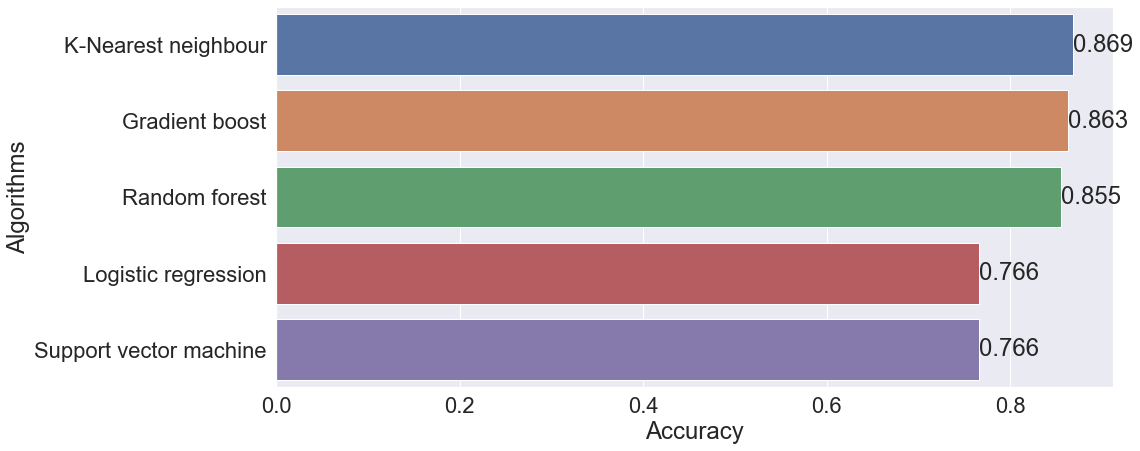

In [46]:
######################################## ACCURACY OF EACH ALGORITHM ######################################################
sn.set(rc={'figure.figsize':(15,7)},font_scale=2)
plot_acc = sn.barplot(y="Algorithms", x="Accuracy",orient='h', data=metrics_df.sort_values("Accuracy", ascending=False))
# label each bar in barplot
for p in plot_acc.patches:
    height = p.get_height() # height of each horizontal bar is the same
    width = p.get_width() # width 
     # adding text to each bar
    plot_acc.text(x = width, # x-coordinate position of data label, padded 3 to right of bar
    y = p.get_y()+(height/2), # # y-coordinate position of data label, padded to be in the middle of the bar
    s = '{:0.3f}'.format(width), # data label, formatted to ignore decimals
    va = 'center') # sets vertical alignment (va) to center
plt.show()

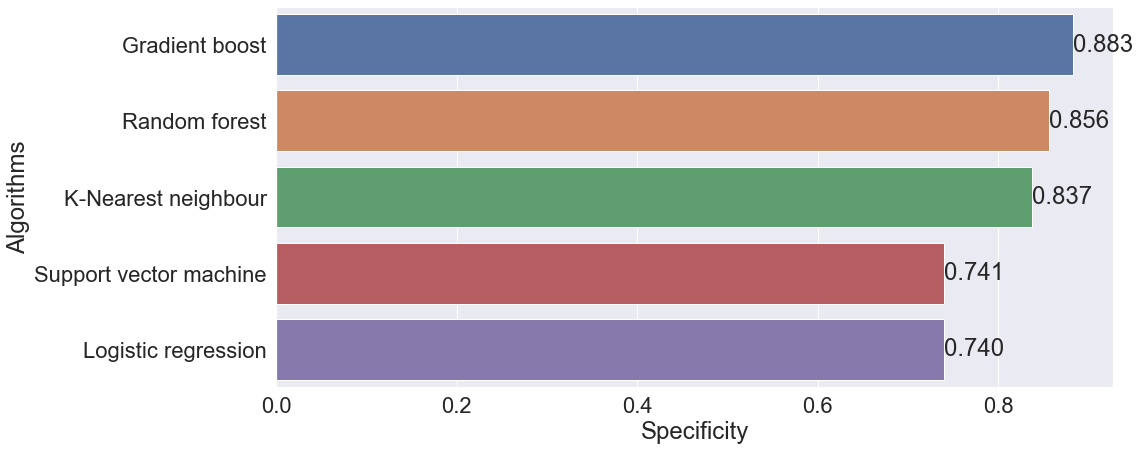

In [55]:
######################################## SPECIFICITY OF EACH ALGORITHM ######################################################
sn.set(rc={'figure.figsize':(15,7)},font_scale=2)
plot_spec = sn.barplot(y="Algorithms", x="Specificity",orient='h', data=metrics_df.sort_values("Specificity", ascending=False))
# label each bar in barplot
for p in plot_spec.patches:
    height = p.get_height() # height of each horizontal bar is the same
    width = p.get_width() # width 
     # adding text to each bar
    plot_spec.text(x = width, # x-coordinate position of data label, padded 3 to right of bar
    y = p.get_y()+(height/2), # # y-coordinate position of data label, padded to be in the middle of the bar
    s = '{:0.3f}'.format(width), # data label, formatted to ignore decimals
    va = 'center') # sets vertical alignment (va) to center
plt.show()

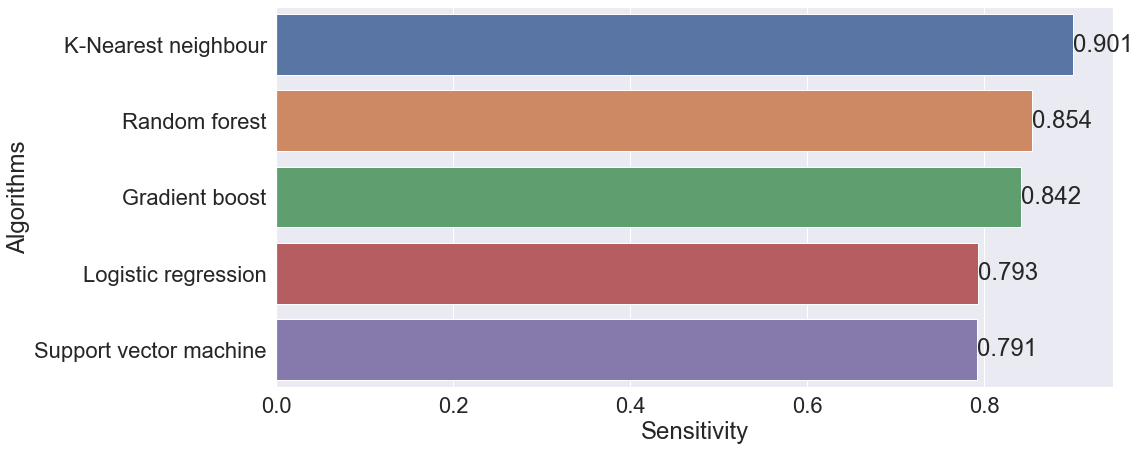

In [56]:
##################################### SENSITIVITY OF EACH ALGORITHM ################################################
sn.set(rc={'figure.figsize':(15,7)},font_scale=2)
plot_sen = sn.barplot(y="Algorithms", x="Sensitivity",orient='h', data=metrics_df.sort_values("Sensitivity", ascending=False))
# label each bar in barplot
for p in plot_sen.patches:
    height = p.get_height() # height of each horizontal bar is the same
    width = p.get_width() # width 
     # adding text to each bar
    plot_sen.text(x = width, # x-coordinate position of data label, padded 3 to right of bar
    y = p.get_y()+(height/2), # # y-coordinate position of data label, padded to be in the middle of the bar
    s = '{:0.3f}'.format(width), # data label, formatted to ignore decimals
    va = 'center') # sets vertical alignment (va) to center
plt.show()

In [10]:
warnings.filterwarnings("ignore")

C:\Users\eugen\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [11]:
import pickle

In [16]:
# save model to file
pickle.dump(cal_full_KNN, open("C:/Users/eugen/Desktop/Work/Merkle/model.pickle.dat", "wb"))

In [12]:
#Loading model into IDE
loaded_model = pickle.load(open("C:/Users/eugen/Desktop/Work/Merkle/model.pickle.dat", "rb"))

In [13]:
#Prediction output
p.DataFrame(loaded_model.predict(test_X[0:5])).replace(1,"Churn").replace(0,"No churn")

,0
0,Churn
1,No churn
2,No churn
3,Churn
4,No churn


In [17]:
#import joblib

In [16]:
#joblib.dump(cal_full_GB, "C:/Users/eugen/Desktop/Work/Merkle/model.pickle.sav")

In [18]:
#loaded_model = joblib.load("C:/Users/eugen/Desktop/Work/Merkle/model.pickle.sav")

In [19]:
#p.DataFrame(loaded_model.predict(test_X[0:5])).replace(1,"Churn").replace(0,"No churn")

## Deriving a campaign through clustering

In [22]:
warnings.filterwarnings("ignore")

C:\Users\eugen\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [51]:
data_dums["Churn"] = data["Churn"]
data_dums["customerID"] = data["customerID"]
data_churn = data_dums.loc[data_dums["Churn"]=="No",]
data_churn = p.DataFrame(data_churn.drop(["TotalCharges"],axis=1))
data_churn.head()

,SeniorCitizen,tenure,MonthlyCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn,customerID
0,0,1,29.85,1,0,0,1,1,0,1,...,0,0,0,1,0,0,1,0,No,7590-VHVEG
1,0,34,56.95,0,1,1,0,1,0,0,...,1,0,1,0,0,0,0,1,No,5575-GNVDE
3,0,45,42.30,0,1,1,0,1,0,1,...,1,0,1,0,1,0,0,0,No,7795-CFOCW
6,0,22,89.10,0,1,1,0,0,1,0,...,0,0,0,1,0,1,0,0,No,1452-KIOVK
7,0,10,29.75,1,0,1,0,1,0,1,...,0,0,1,0,0,0,0,1,No,6713-OKOMC


In [52]:
print(len(data_churn))

5174


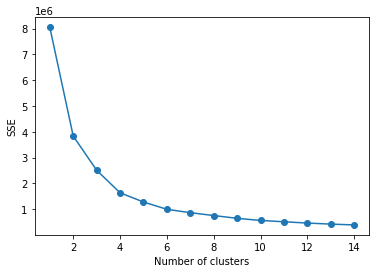

In [53]:
#Dropping the Churn and customer columns which is not needed in the clustering process
Churn_clustering = data_churn.drop(["Churn","customerID"], 1)

SSE_vec=[] #Initialising list for SSE
kmeans_mods=[]  #Initialising list for K-means clustering models
for k in range(1,15):
    # run k-means clustering
    kmeans = KMeans(n_clusters=k, random_state=0).fit(Churn_clustering)
    SSE_vec.append(kmeans.inertia_)
    kmeans_mods.append(kmeans)

# plotting the intra SSE versus the number of clusters
plt.plot(range(1, 15), SSE_vec, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [54]:
np.unique(kmeans_mods[3].labels_ + 1)

array([1, 2, 3, 4])

In [56]:
data_churn["customerID"] = data["customerID"] #Adding customer IDs to the clustered data
data_churn["Cluster"] = kmeans_mods[3].labels_ + 1 #Bringing the cluster labels to the first column
cols = data_churn.columns.tolist() 
cols = cols[-1:] + cols[:-1]   #Pushing the Cluster labels to the first column
data_churn = data_churn[cols]
data_churn.head()

,customerID,Cluster,SeniorCitizen,tenure,MonthlyCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,7590-VHVEG,2,0,1,29.85,1,0,0,1,1,...,1,0,0,0,1,0,0,1,0,No
1,5575-GNVDE,4,0,34,56.95,0,1,1,0,1,...,0,1,0,1,0,0,0,0,1,No
3,7795-CFOCW,3,0,45,42.30,0,1,1,0,1,...,0,1,0,1,0,1,0,0,0,No
6,1452-KIOVK,4,0,22,89.10,0,1,1,0,0,...,1,0,0,0,1,0,1,0,0,No
7,6713-OKOMC,2,0,10,29.75,1,0,1,0,1,...,1,0,0,1,0,0,0,0,1,No


In [57]:
#Distribution of loyal clients
data_churn.loc[:,["Churn","Cluster"]].groupby("Cluster").count().reset_index()

,Cluster,Churn
0,1,1619
1,2,1209
2,3,996
3,4,1350


In [71]:
# Categorical features
cat_feat = ['SeniorCitizen', 'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes', 'Dependents_No', 
            'Dependents_Yes', 'PhoneService_No', 'PhoneService_Yes', 'MultipleLines_No', 'MultipleLines_No phone service',
            'MultipleLines_Yes', 'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No', 
            'OnlineSecurity_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No',
            'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No',
            'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No',
            'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No', 'StreamingTV_No internet service', 
            'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_No internet service', 'StreamingMovies_Yes',
            'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_No', 'PaperlessBilling_Yes',
            'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)',
            'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']

In [78]:
#Obtaining the means of quantitative features per cluster
cluster_means=data_churn.loc[:,["Cluster","tenure","MonthlyCharges"]].groupby("Cluster",as_index=False).mean()
cluster_means

,Cluster,tenure,MonthlyCharges
0,1,60.067326,92.764145
1,2,12.566584,27.583954
2,3,56.186747,32.628213
3,4,19.246667,74.780667


In [82]:
print(quan_feat_mean)

[37.56996521066873, 61.2651236953999]


In [72]:
cat_feat.append("Cluster") #Run this prior to running the next cell

In [75]:
#Obtaining the modes of categorical features per cluster
cluster_modes = data_churn.loc[:,cat_feat].groupby("Cluster").apply(p.DataFrame.mode).reset_index(drop=True)
cluster_modes

,SeniorCitizen,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Cluster
0,0,1,0,0,1,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,1,1,0,1,0,0,1,1,...,1,0,0,1,0,0,0,0,1,2
2,0,1,0,0,1,1,0,0,1,0,...,0,0,1,1,0,0,0,0,0,3
3,0,0,1,1,0,1,0,0,1,1,...,1,0,0,0,1,0,0,0,0,4


In [88]:
quan_feat = ["tenure","MonthlyCharges"] #Quantitative features
quan_feat_mean = list(data_churn.loc[:,quan_feat].mean()) #Overall means for each quantitative feature
cat_feat_mode = data_churn.loc[:,cat_feat].mode().to_numpy().tolist()[0] #Overall modes for each categorical feature

unique_features=[[],[],[],[]] #Initializing nested lists

#Including quantitative features that have cluster means higher than respective overall means 
for col in range(1,len(list(cluster_means))):
    for row in range(0,len(cluster_means)):
        if cluster_means.iloc[row,col] > quan_feat_mean[col-1]:
            unique_features[row].append(quan_feat[col-1])

#Including categorical features that have cluster modes equal to overall mode and if the modes indicate a presence (=1)
for col in range(0,len(list(cluster_modes))-1):
    for row in range(0,len(cluster_modes)):
        if cluster_modes.iloc[row,col] == cat_feat_mode[col] and cluster_modes.iloc[row,col] == 1:
            unique_features[row].append(cat_feat[col])

#Displaying the unique features per cluster
for i in range(0,len(unique_features)):
    print("{} determinants of cluster {}: ".format(len(unique_features[i]),i+1),unique_features[i])
    print(" ")
        
    

6 determinants of cluster 1:  ['tenure', 'MonthlyCharges', 'Partner_Yes', 'Dependents_No', 'PhoneService_Yes', 'PaperlessBilling_Yes']
 
3 determinants of cluster 2:  ['gender_Male', 'Dependents_No', 'PhoneService_Yes']
 
4 determinants of cluster 3:  ['tenure', 'Partner_Yes', 'Dependents_No', 'PhoneService_Yes']
 
5 determinants of cluster 4:  ['MonthlyCharges', 'gender_Male', 'Dependents_No', 'PhoneService_Yes', 'PaperlessBilling_Yes']
 


# Using the model from back-end

In [97]:
# Function: Function for predicting the churn status of a customer
# Input: Data must be a numpy array of pandas data frame
# Return: Output is a pandas data frame with 2 columns, churn status and campaign status
def predictor(data):
    
    predicted = list(loaded_model.predict_proba(data)[:,1])
    churn_vec = []
    campaign_vec = []
    
    for i in range(0,len(predicted)):
        if predicted[i] >= 0.8:
            churn_vec.append("Churn")
            campaign_vec.append("Retention campain")
        else:
            churn_vec.append("Not churn")
            campaign_vec.append("No retention campaign")
    
    pred_data = p.DataFrame({"Churn":churn_vec,
                            "Campaign":campaign_vec})
    return pred_data

In [98]:
#Testing the features
predictor(test_X[0:5])

,Churn,Campaign
0,Not churn,No retention campaign
1,Not churn,No retention campaign
2,Not churn,No retention campaign
3,Churn,Retention campain
4,Not churn,No retention campaign


# Front-end usage of the best model

In [14]:
from flask import Flask, render_template, request, make_response

In [15]:
app = Flask(__name__)

@app.route('/')
def home_method():
    return render_template('Form.html')

#To use the predict button in our web-app
@app.route('/predict',methods=['POST','GET'])
def predict():
        #Creating customer's data
    pred_data = p.DataFrame({'SeniorCitizen':[request.form["SeniorCitizen"]], 'tenure':[request.form["tenure"]], 
                             'MonthlyCharges':[request.form["MonthlyCharges"]], 'gender_Female':[1 if request.form["gender"]=="Female" else 0],
                             'gender_Male':[1 if request.form["gender"]=="Male" else 0], 'Partner_No':[1 if request.form["Partner"]=="No" else 0],
                             'Partner_Yes':[1 if request.form["Partner"]=="Yes" else 0], 'Dependents_No':[1 if request.form["Dependents"]=="No" else 0],
                             'Dependents_Yes':[1 if request.form["Dependents"]=="Yes" else 0],'PhoneService_No':[1 if request.form["PhoneService"]=="No" else 0],
                             'PhoneService_Yes':[1 if request.form["PhoneService"]=="Yes" else 0], 'MultipleLines_No':[1 if request.form["MultipleLines"]=="No" else 0],
                             'MultipleLines_No phone service':[1 if request.form["MultipleLines"]=="No phone service" else 0],
                             'MultipleLines_Yes':[1 if request.form["MultipleLines"]=="Yes" else 0], 'InternetService_DSL':[1 if request.form["InternetService"]=="DSL" else 0],
                             'InternetService_Fiber optic':[1 if request.form["InternetService"]=="Fiber optic" else 0], 
                             'InternetService_No':[1 if request.form["InternetService"]=="No" else 0], 'OnlineSecurity_No':[1 if request.form["OnlineSecurity"]=="No" else 0],
                             'OnlineSecurity_No internet service':[1 if request.form["OnlineSecurity"]=="No internet service" else 0], 
                             'OnlineSecurity_Yes':[1 if request.form["OnlineSecurity"]=="Yes" else 0], 'OnlineBackup_No':[1 if request.form["OnlineBackup"]=="No" else 0],
                             'OnlineBackup_No internet service':[1 if request.form["OnlineBackup"]=="No internet service" else 0],
                             'OnlineBackup_Yes':[1 if request.form["OnlineBackup"]=="Yes" else 0], 'DeviceProtection_No':[1 if request.form["DeviceProtection"]=="No" else 0],
                             'DeviceProtection_No internet service':[1 if request.form["DeviceProtection"]=="No internet service" else 0],
                             'DeviceProtection_Yes':[1 if request.form["DeviceProtection"]=="Yes" else 0],
                             'TechSupport_No':[1 if request.form["TechSupport"]=="No" else 0],'TechSupport_No internet service':[1 if request.form["TechSupport"]=="No internet service" else 0],
                             'TechSupport_Yes':[1 if request.form["TechSupport"]=="Yes" else 0], 'Contract_Month-to-month':[1 if request.form["Contract"]=="Month-to-month" else 0],
                             'Contract_One year':[1 if request.form["Contract"]=="One year" else 0], 'Contract_Two year':[1 if request.form["Contract"]=="Two year" else 0],
                             'PaperlessBilling_No':[1 if request.form["PaperlessBilling"]=="No" else 0],'PaperlessBilling_Yes':[1 if request.form["PaperlessBilling"]=="Yes" else 0],
                             'PaymentMethod_Bank transfer (automatic)':[1 if request.form["PaymentMethod"]=="Bank transfer (automatic)" else 0],
                             'PaymentMethod_Credit card (automatic)':[1 if request.form["PaymentMethod"]=="Credit card (automatic)" else 0],
                             'PaymentMethod_Electronic check':[1 if request.form["PaymentMethod"]=="Electronic check" else 0],
                             'PaymentMethod_Mailed check':[1 if request.form["PaymentMethod"]=="Mailed check" else 0], 'Streaming_Movies':[1 if request.form["Streaming"]=="Movies" else 0],
                             'Streaming_No internet service':[1 if request.form["Streaming"]=="No internet service" else 0],
                             'Streaming_None':[1 if request.form["Streaming"]=="None" else 0], 'Streaming_TV':[1 if request.form["Streaming"]=="TV" else 0],
                             'Streaming_TV & Movies':[1 if request.form["Streaming"]=="TV & Movies" else 0]})
    
    #For rendering results on HTML GUI
    prediction_prob = list(loaded_model.predict_proba(pred_data)[:,1])[0]
    print(prediction_prob)
    if prediction_prob >= 0.8:
        outcome = "CHURN"
        campaign = "RENTENTION CAMPAIGN (Tenure, Monthly charge, Has partner, No dependent, Has phone service, Likes paperless billing)"
    else:
        outcome = "NOT CHURN"
        campaign = "NO CAMPAIGN NEEDED"
    
    return render_template('Form.html', prediction_text='Predicted status :{}, '.format(outcome),campaign_text= campaign)

if __name__ == '__main__':
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [10/Mar/2021 10:47:40] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [10/Mar/2021 10:47:45] "GET /favicon.ico HTTP/1.1" 404 -


In [105]:
list(loaded_model.predict_proba(test_X[0:1])[:,1])[0]

0.7945789226126041